# Análise exploratória de dados de varejo no Python

In [73]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import seaborn as sns
import datetime as dt

## Carregando os Dados

In [74]:
# Carrega o dataset
df = pd.read_csv('dataset_proj2.csv')

In [75]:
# Shape
df.shape

(9700, 11)

In [76]:
# Amostra dos dados
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [77]:
# Amostra dos dados
df.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


## Análise Exploratória

In [78]:
# Colunas do conjunto de dados
df.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [79]:
# Verificando o tipo de dado de cada coluna
df.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [80]:
# Resumo estatístico da coluna com o valor de venda
df['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [81]:
# Verificando se há registros duplicados
df[df.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [82]:
# Verificando de há valores ausentes
df.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [83]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


## Pergunta de Negócio 1:

### Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [84]:
groupby = df[df['Categoria'] == 'Office Supplies'].groupby('Cidade')['Valor_Venda'].sum()
cidade = groupby.idxmax()

print("A cidade com maior valor de venda de produtos da categoria 'Office Supplies' é",cidade)

A cidade com maior valor de venda de produtos da categoria 'Office Supplies' é New York City


## Pergunta de Negócio 2:

### Qual o Total de Vendas Por Data do Pedido?

Demonstre o resultado através de um gráfico de barras.

In [85]:
df.head(1)

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.96


In [86]:
df['Data_Pedido'] = pd.to_datetime(df['Data_Pedido'], dayfirst=True)

In [87]:
data_pedido = df.groupby('Data_Pedido')['Valor_Venda'].sum().reset_index()

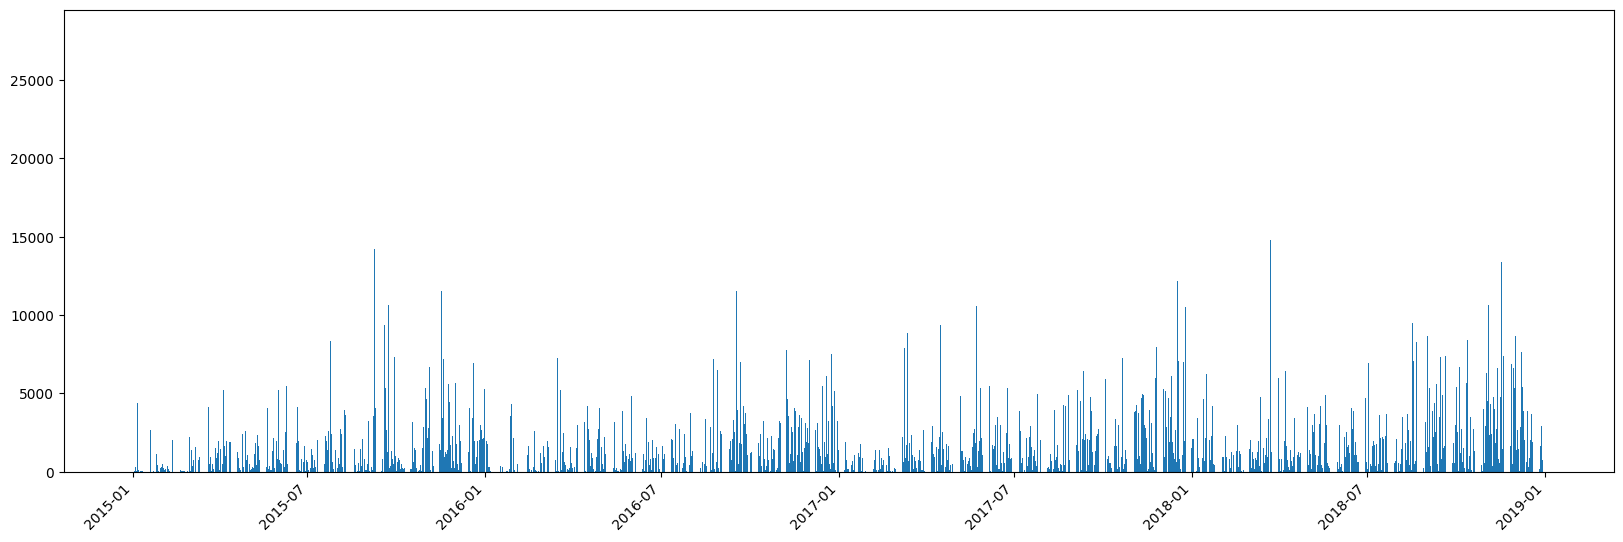

In [88]:
sns.reset_defaults()
plt.figure(figsize=(20,6))
plt.bar(data_pedido['Data_Pedido'],data_pedido['Valor_Venda'])
plt.xticks(rotation=45, ha='right')
plt.show()

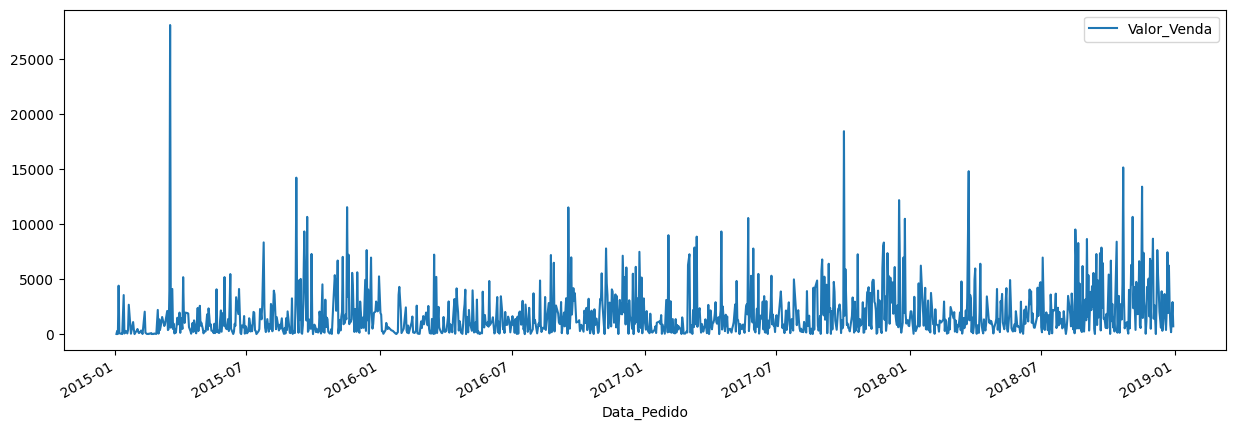

In [89]:
# Solução do professor (que não está em barras)

#plt.figure(figsize=(20,6))
data_pedido.plot(x='Data_Pedido', y='Valor_Venda')
plt.gcf().set_size_inches(15, 5)
plt.show()

## Pergunta de Negócio 3:

### Qual o Total de Vendas por Estado?

Demonstre o resultado através de um gráfico de barras.

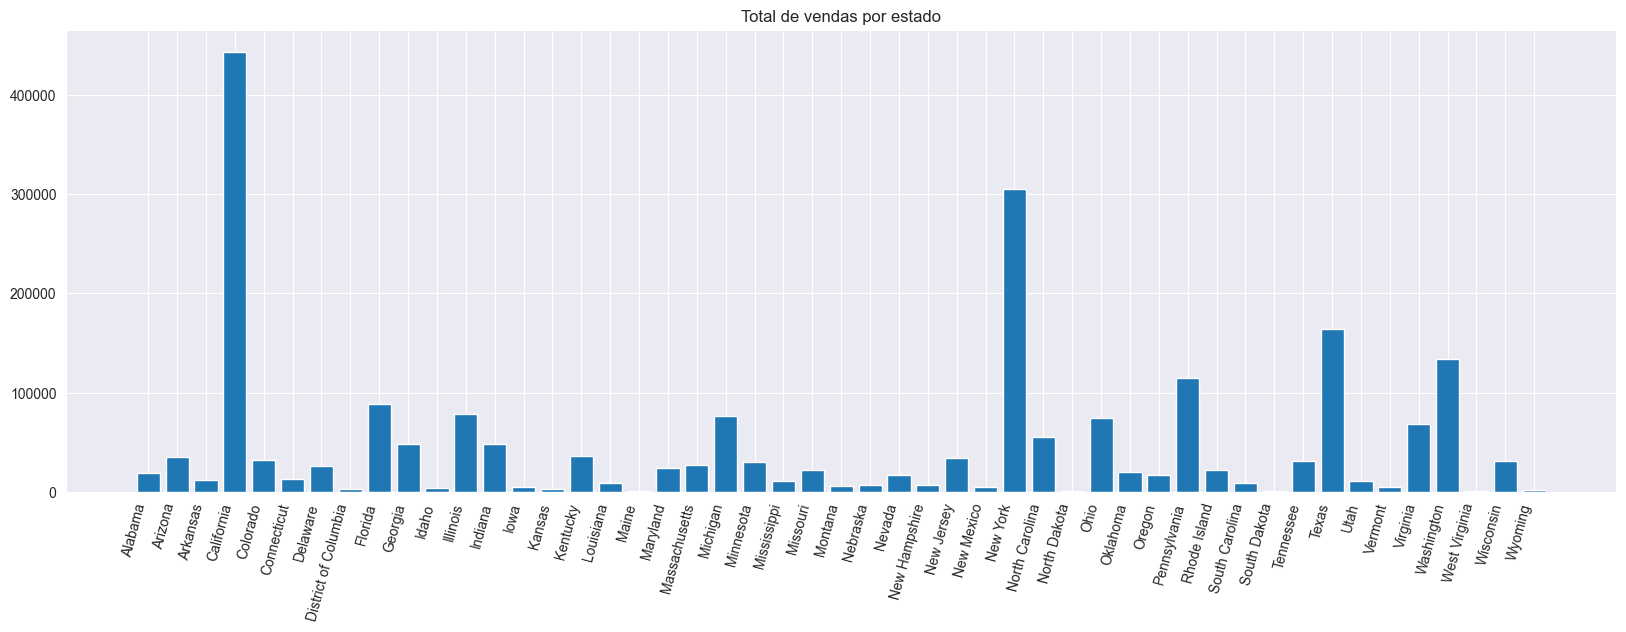

In [109]:
estado = df.groupby('Estado')['Valor_Venda'].sum().reset_index()

sns.set_style('darkgrid')
plt.figure(figsize=(20,6))
plt.bar(estado['Estado'],estado['Valor_Venda'])
plt.xticks(rotation=75, ha='right')
plt.title('Total de vendas por estado')
plt.show()

## Pergunta de Negócio 4:

### Quais São as 10 Cidades com Maior Total de Vendas?

Demonstre o resultado através de um gráfico de barras.

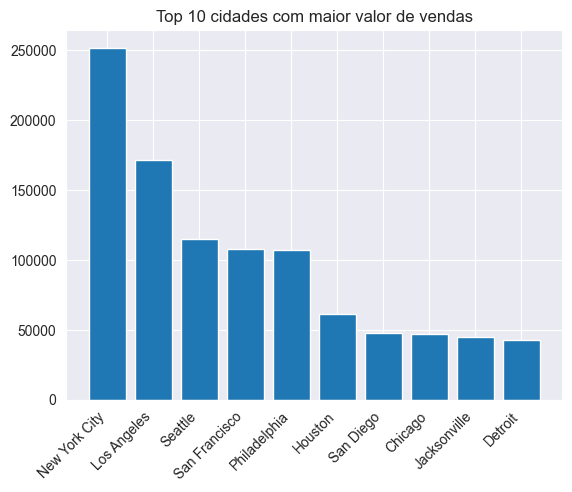

In [91]:
cidades = df.groupby('Cidade')['Valor_Venda'].sum().reset_index()
cidades = cidades.sort_values('Valor_Venda', ascending=False)
top10cidades = cidades.head(10)

plt.bar(top10cidades['Cidade'],top10cidades['Valor_Venda'])
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 cidades com maior valor de vendas')
plt.show()

## Pergunta de Negócio 5:

### Qual Segmento Teve o Maior Total de Vendas?

Demonstre o resultado através de um gráfico de pizza.

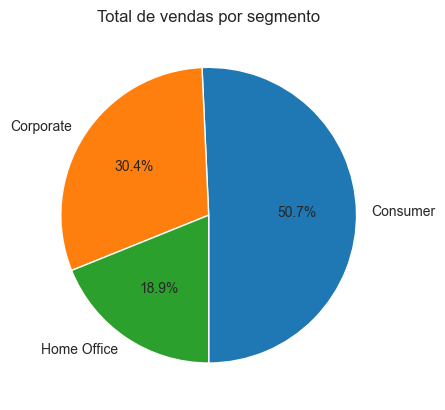

In [92]:
segmento = df.groupby('Segmento')['Valor_Venda'].sum().reset_index()
segmento['Valor_Venda'] = round(segmento['Valor_Venda'].astype('Float64'),2)
rotulos = list(segmento['Segmento'])

plt.pie(segmento['Valor_Venda'], autopct='%1.1f%%', labels = rotulos, startangle=270)
plt.title('Total de vendas por segmento')
plt.show()

## Pergunta de Negócio 6 (Desafio Nível Baby):

### Qual o Total de Vendas Por Segmento e Por Ano?

In [93]:
# Exibindo apenas como tabela

df['Ano'] = df['Data_Pedido'].dt.year
total_segmento_ano = df.groupby(['Ano','Segmento'])['Valor_Venda'].sum()
total_segmento_ano

Ano   Segmento   
2015  Consumer       256719.9166
      Corporate      125819.5957
      Home Office     88229.0878
2016  Consumer       265295.2593
      Corporate      114643.1229
      Home Office     74134.1332
2017  Consumer       288459.5572
      Corporate      203266.7398
      Home Office    103639.6270
2018  Consumer       323359.6019
      Corporate      235502.7284
      Home Office    156488.5849
Name: Valor_Venda, dtype: float64

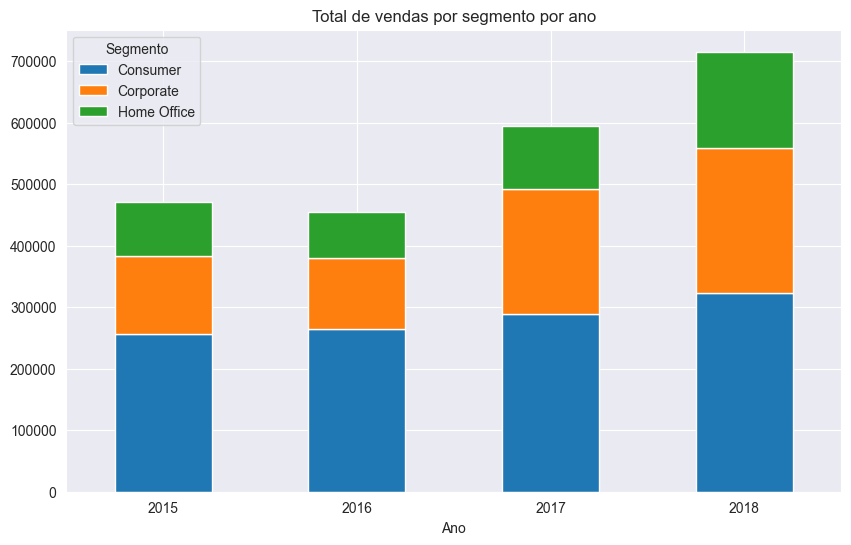

In [94]:
# Indo além e incluindo um gráfico

## Colocando a tabela no formato certo
total_segmento_ano = df.groupby(['Ano','Segmento'])['Valor_Venda'].sum().reset_index()
pivot = total_segmento_ano.pivot(index='Ano', columns='Segmento', values='Valor_Venda').fillna(0)
pivot.head()

## Plotando o gráfico
pivot.plot(kind='bar', stacked='True', figsize=(10,6))
plt.title('Total de vendas por segmento por ano')
plt.xticks(rotation='horizontal')
plt.show()

## Pergunta de Negócio 7 (Desafio Nível Júnior):

Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

### Quantas Vendas Receberiam 15% de Desconto?

In [95]:
contagem = df[df['Valor_Venda'] > 1000].shape
print(contagem[0],"vendas receberiam 15% de desconto")

457 vendas receberiam 15% de desconto


## Pergunta de Negócio 8 (Desafio Nível Master):

### Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [96]:
# Considerando a média total de vendas (minha interpretação do enunciado)

Valor_Desconto = [0.85 *x if x > 1000 else x for x in df['Valor_Venda']]
df['Valor_Desconto'] = Valor_Desconto

media_antes = round(df['Valor_Venda'].mean(),2)
media_depois = round(df['Valor_Desconto'].mean(),2)

print('A média de valor de venda antes do desconto é de',media_antes,'e a média de valor de venda depois do desconto é de',media_depois)

A média de valor de venda antes do desconto é de 230.47 e a média de valor de venda depois do desconto é de 215.51


In [97]:
# Considerando a média apenas dos itens com desconto (interpretação na solução do curso)

df_desconto = df[df['Valor_Venda'] > 1000]

media_antes2 = round(df_desconto['Valor_Venda'].mean(),2)
media_depois2 = round(df_desconto['Valor_Desconto'].mean(),2)

print('A média de valor de venda antes do desconto é de',media_antes2,'e a média de valor de venda depois do desconto é de',media_depois2)


A média de valor de venda antes do desconto é de 2116.81 e a média de valor de venda depois do desconto é de 1799.29


## Pergunta de Negócio 9 (Desafio Nível Master Ninja):

### Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?

Demonstre o resultado através de gráfico de linha.

In [98]:
#df['Mes_Ano'] = df['Data_Pedido'].str[6:]+'/'+df['Data_Pedido'].str[3:5]
df['Mes_Ano'] = df['Data_Pedido'].dt.strftime('%Y-%m')

In [99]:
consumer = df[df['Segmento'] == 'Consumer']
consumer = consumer.groupby('Mes_Ano')['Valor_Venda'].mean()

In [100]:
corporate = df[df['Segmento'] == 'Corporate']
corporate = corporate.groupby('Mes_Ano')['Valor_Venda'].mean()

In [101]:
HomeOffice = df[df['Segmento'] == 'Home Office']
HomeOffice = HomeOffice.groupby('Mes_Ano')['Valor_Venda'].mean()

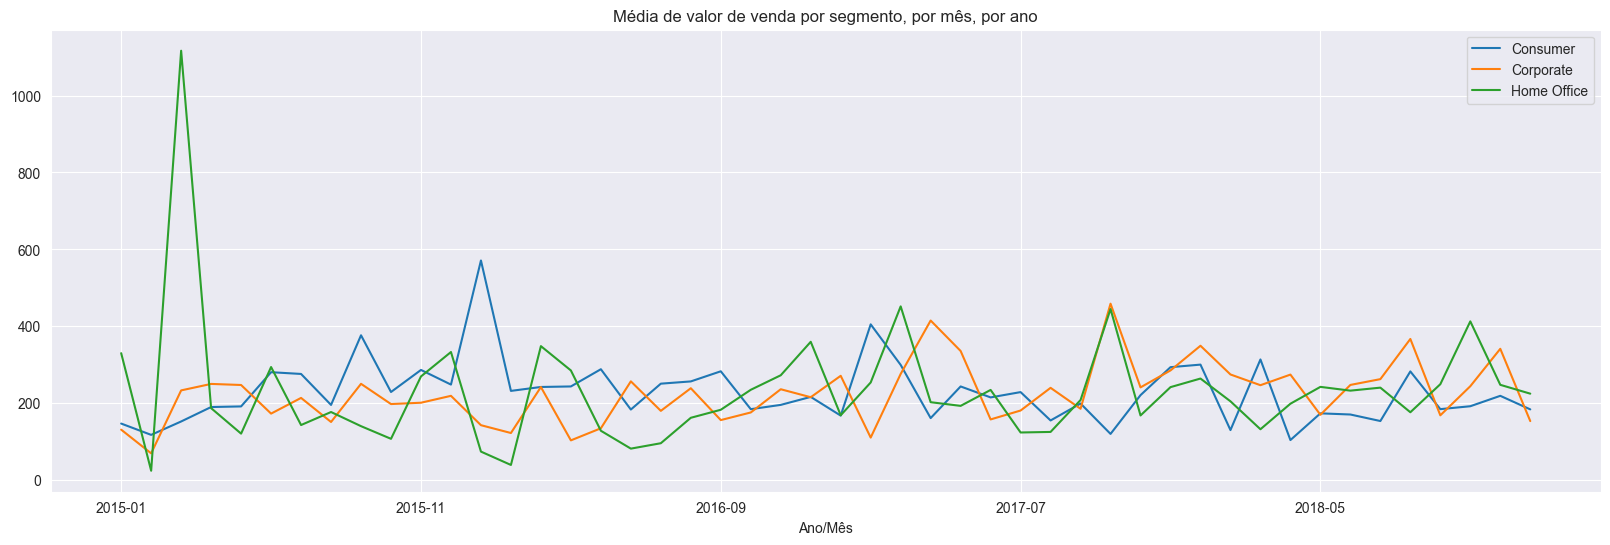

In [102]:
plt.figure(figsize=(20,6))
sns.set_style('darkgrid')
consumer.plot(x='Segmento',y='Valor_Venda', label = "Consumer")
corporate.plot(x='Segmento',y='Valor_Venda', label = "Corporate")
HomeOffice.plot(x='Segmento',y='Valor_Venda', label = "Home Office")
plt.title('Média de valor de venda por segmento, por mês, por ano')
plt.xlabel('Ano/Mês')
plt.legend()
plt.show()

<Figure size 1200x600 with 0 Axes>

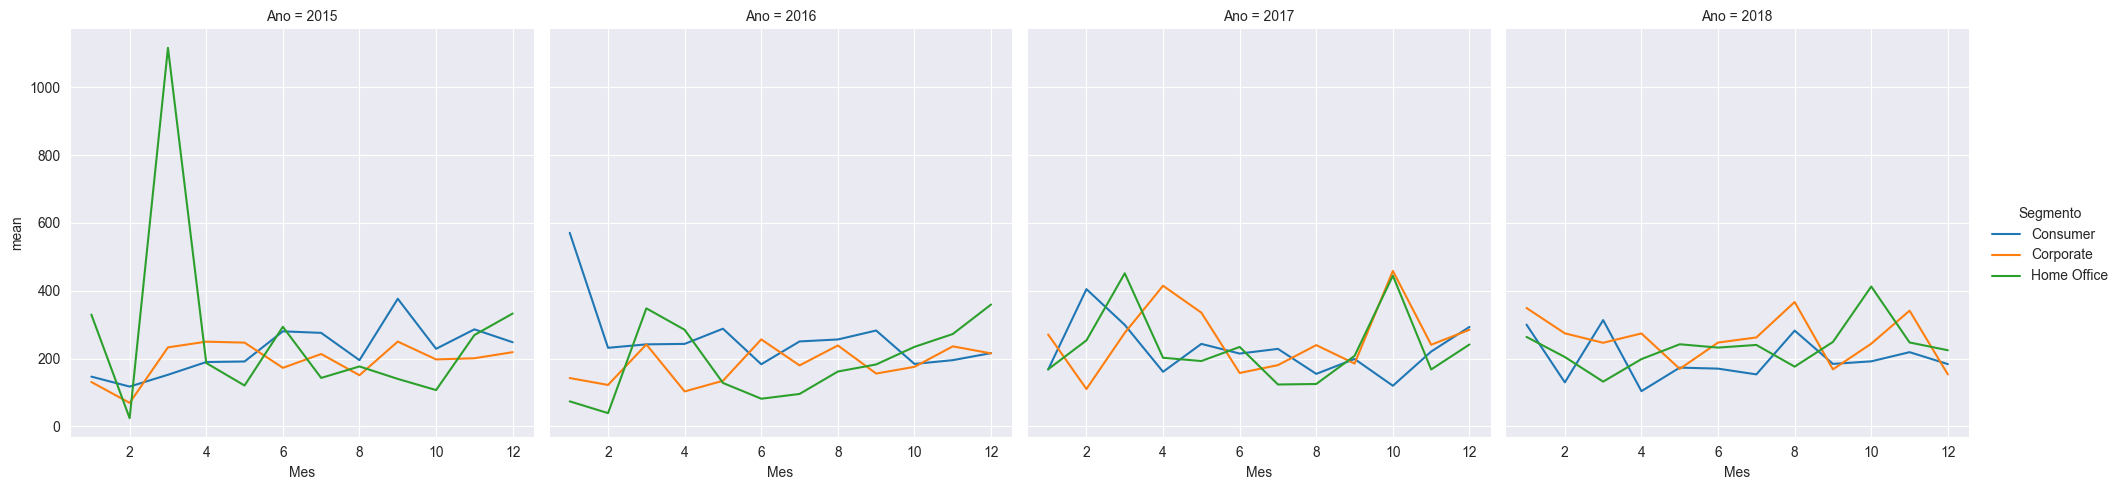

In [103]:
# Pesquisar depois a solução dada pelo curso: relplot do Seaborne

df['Mes'] = df['Data_Pedido'].dt.month
df_p9 = df.groupby(['Ano', 'Mes', 'Segmento'])['Valor_Venda'].agg(['sum', 'mean', 'median'])

anos = df_p9.index.get_level_values(0)
meses = df_p9.index.get_level_values(1)
segmentos = df_p9.index.get_level_values(2)

# Plot
plt.figure(figsize = (12, 6))
fig1 = sns.relplot(kind = 'line',
                   data = df_p9, 
                   y = 'mean', 
                   x = meses,
                   hue = segmentos, 
                   col = anos,
                   col_wrap = 4)
plt.show()

## Pergunta de Negócio 10 (Desafio Nível Master Ninja das Galáxias):

### Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias? 

Demonstre tudo através de um único gráfico.

In [104]:
groupby_sc = df.groupby('SubCategoria')['Valor_Venda'].sum().reset_index()
top12sc = groupby_sc.sort_values('Valor_Venda', ascending=False).head(12).reset_index()
top12sc

,index,SubCategoria,Valor_Venda
0,13,Phones,325271.2940
1,5,Chairs,317919.6250
2,14,Storage,216188.3620
3,16,Tables,202083.3600
4,3,Binders,194723.3810
5,11,Machines,189238.6310
6,0,Accessories,162791.3620
7,6,Copiers,146248.0940
8,4,Bookcases,108045.0467
9,1,Appliances,104061.6930


In [105]:
filtrado = df[df['SubCategoria'].isin(top12sc['SubCategoria'])]
agr = filtrado.groupby(['Categoria','SubCategoria'])['Valor_Venda'].sum().reset_index()
agr_pivot = pd.pivot_table(agr,values='Valor_Venda',index='Categoria',columns='SubCategoria').fillna(0)

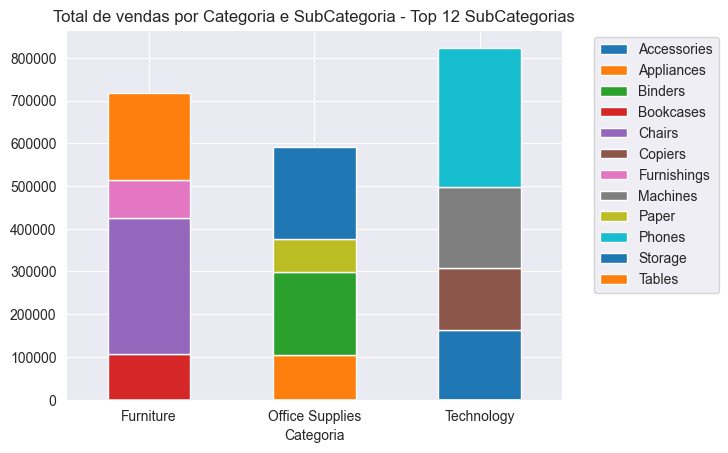

In [122]:
agr_pivot.plot(kind='bar', stacked='True')

plt.title('Total de vendas por Categoria e SubCategoria - Top 12 SubCategorias')
plt.xticks(rotation='horizontal')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

# Fim